Visualize the poor man's P-test from BMJ

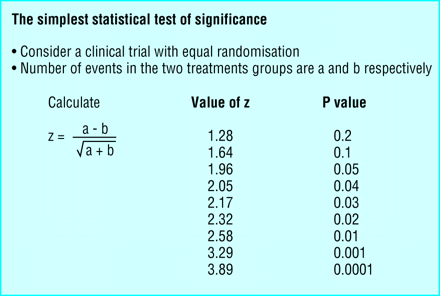

Calculate the difference in the two numbers of events and divide by the square root of their sum. Call the resulting number z.

Under the null hypothesis that the two treatments have an identical influence on the risk of an event, z is approximately a standardized normal deviate—that is, it has a normal distribution with mean 0 and variance 1. From commonly available normal distribution tables, z can be converted into a P value (see figure). For instance z > 1.96 means P < 0.05 and z > 2.58 means P < 0.01.

This test is approximate but generally gives reliable results for the following reason. With randomization, the number of patients in the two treatment groups will be almost equal, as will the length of patient follow-up. Event rates are usually quite low—for example, less than 20% of patients (and often much lower)—and so the number of patients having an event in each group can be considered to have Poisson distribution. Provided that the total number of events is not too small—for example, not less than 20, then the normal approximation for the comparison of two Poisson random variables1 leads to the formula in the figure. 

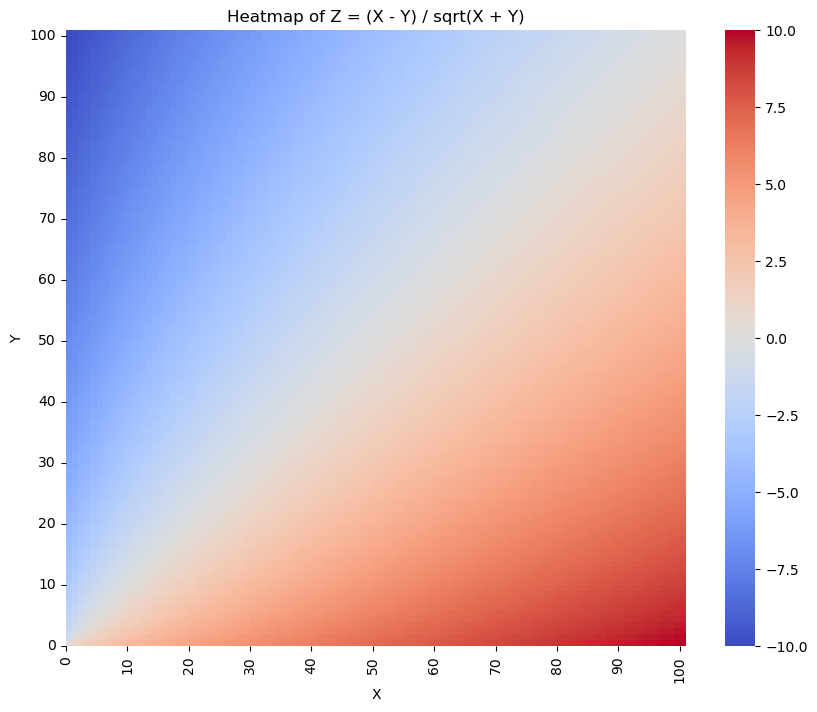

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Define the range for x and y
x = np.linspace(0, 100, 101)
y = np.linspace(0, 100, 101)

# Create the meshgrid
X, Y = np.meshgrid(x, y)

# Calculate Z based on the given formula
Z = (X - Y) / np.sqrt(X + Y + 1e-9)  # Adding a small constant to avoid division by zero

# Plotting the heatmap
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(Z, xticklabels=x, yticklabels=y, cmap="coolwarm", cbar=True)
heatmap.invert_yaxis()  # Invert the y-axis

# Set the tick marks to occur every 10 units for both axes
heatmap.set_xticks(np.arange(0, len(x), 10))
heatmap.set_xticklabels(np.arange(0, 101, 10))
heatmap.set_yticks(np.arange(0, len(y), 10))
heatmap.set_yticklabels(np.arange(0, 101, 10))

# Set labels and title
heatmap.set_xlabel('X')
heatmap.set_ylabel('Y')
heatmap.set_title('Heatmap of Z = (X - Y) / sqrt(X + Y)')
plt.show()

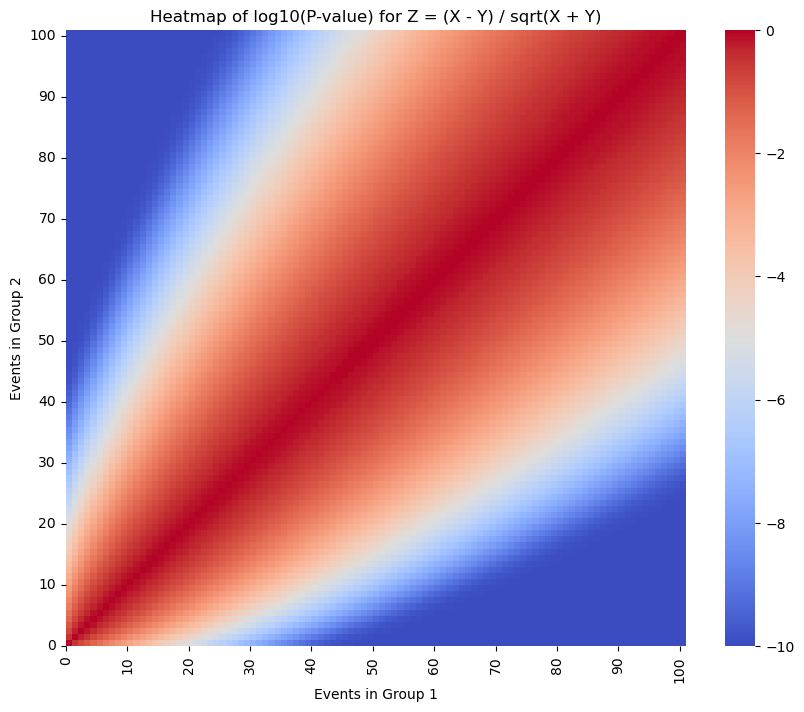

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Define the range for x and y
x = np.linspace(0, 100, 101)
y = np.linspace(0, 100, 101)

# Create the meshgrid
X, Y = np.meshgrid(x, y)

# Calculate Z based on the given formula
Z = (X - Y) / np.sqrt(X + Y + 1e-9)  # Adding a small constant to avoid division by zero

# Calculate p-values
p_value = 2 * (1 - stats.norm.cdf(abs(Z)))

# Apply logarithmic transformation
p_value = np.log10(p_value + 1e-10)  # Adding a small constant to avoid log(0)

# Plotting the heatmap
plt.figure(figsize=(10, 8))
heatmap_pval = sns.heatmap(p_value, xticklabels=x, yticklabels=y, cmap="coolwarm", cbar=True)
heatmap_pval.invert_yaxis()  # Invert the y-axis

# Set the tick marks to occur every 10 units for both axes
heatmap_pval.set_xticks(np.arange(0, len(x), 10))
heatmap_pval.set_xticklabels(np.arange(0, 101, 10))
heatmap_pval.set_yticks(np.arange(0, len(y), 10))
heatmap_pval.set_yticklabels(np.arange(0, 101, 10))

# Set labels and title
heatmap_pval.set_xlabel('Events in Group 1')
heatmap_pval.set_ylabel('Events in Group 2')
heatmap_pval.set_title('Heatmap of log10(P-value) for Z = (X - Y) / sqrt(X + Y)')
plt.show()